In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Finding NULL Values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
# Removing NULL Values
train_data.dropna(inplace=True)

In [6]:
# Checking NULL Values again
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Finding data type of columns
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
# Converting date to time object
def convertTime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    convertTime(i)

In [9]:
# Checking data type of columns
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [10]:
# Storing day & month in different columns
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data.drop('Date_of_Journey', axis=1, inplace=True)
train_data.drop('Additional_Info', axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-09-03 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-03 05:50:00,2021-09-03 13:15:00,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-09-03 09:25:00,2021-06-10 04:25:00,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-03 18:05:00,2021-09-03 23:30:00,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-03 16:50:00,2021-09-03 21:35:00,4h 45m,1 stop,13302,3,1


In [11]:
# Extracting departure & arrival time
for i in ["Dep_Time", "Arrival_Time"]:
    train_data[i+"_hour"]=train_data[i].dt.hour
    train_data[i+"_minute"]=train_data[i].dt.minute
    train_data.drop(i, axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,16,50,21,35


In [12]:
# Refactoring Duration Column
duration__ = list(train_data["Duration"])
for i, item in enumerate(duration__):
    if len(item.split(" "))!=2:
        if 'h' in item:
            duration__[i] = item + " 0m"
        else:
            duration__[i] = "0h " + item
train_data["Duration"] = duration__

In [13]:
# Extracting Duration Column
train_data["Duration_hours"] = train_data["Duration"].apply(lambda x: x.split(" ")[0][:-1])
train_data["Duration_mins"] = train_data["Duration"].apply(lambda x: x.split(" ")[1][:-1])
train_data.drop("Duration", axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,3,1,16,50,21,35,4,45


In [14]:
# Changing data types of duration columns
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [15]:
# Finding Categorical & Continuous columns
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'O']
cont_col = [col for col in train_data.columns if train_data[col].dtype != 'O']

In [16]:
# Making different dataset for categorical & continuous column
categorical_df = train_data[cat_col]
continuous_df = train_data[cont_col]

In [17]:
categorical_df.head()

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop


In [18]:
categorical_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

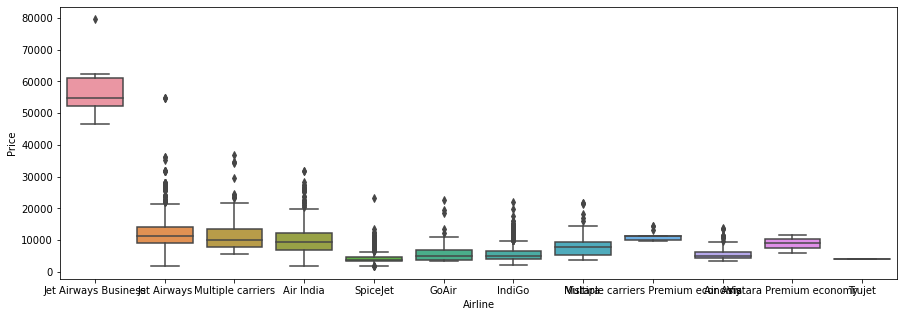

In [19]:
# Plotting Airline v/s Price
plt.figure(figsize=(15,5))
sns.boxplot(y="Price", x='Airline',data=train_data.sort_values('Price',ascending=False))

In [20]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical_df['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
categorical_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

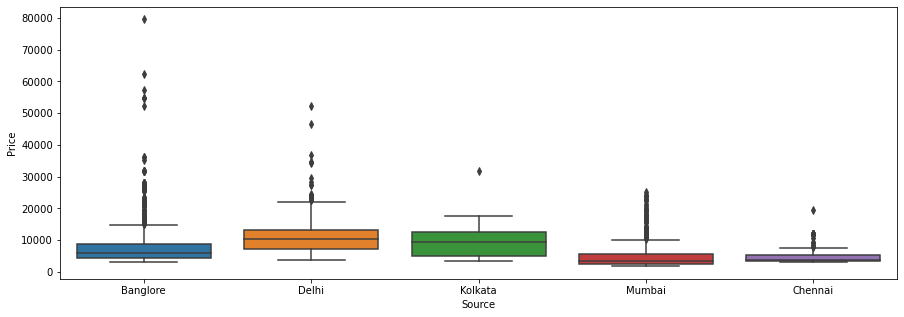

In [22]:
# Plotting Source v/s Price
plt.figure(figsize=(15,5))
sns.boxplot(y="Price", x='Source',data=train_data.sort_values('Price',ascending=False))

In [23]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical_df['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
categorical_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

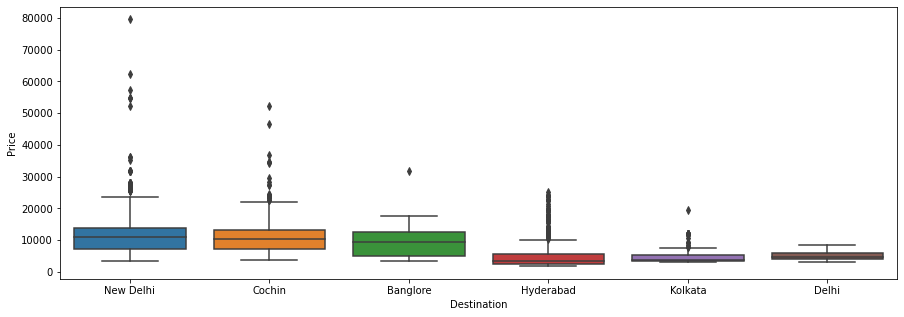

In [25]:
# Plotting Destination v/s Price
plt.figure(figsize=(15,5))
sns.boxplot(y="Price", x='Destination',data=train_data.sort_values('Price',ascending=False))

In [26]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=pd.get_dummies(categorical_df['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
categorical_df["Route"].head()

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object

In [28]:
# Storing routes in different columns
for i in range(5):
    categorical_df[f"Route_{i+1}"]=categorical_df['Route'].str.split('→').str[i]
categorical_df.head()

/tmp/ipykernel_17697/1367161568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[f"Route_{i+1}"]=categorical_df['Route'].str.split('→').str[i]


,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,BLR,NAG,DEL,NaN,NaN


In [29]:
# Removing NaN values from routes
for i in range(5):
    categorical_df[f"Route_{i+1}"].fillna('None', inplace=True)
categorical_df.head()

/usr/lib/python3/dist-packages/pandas/core/series.py:4529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,BLR,NAG,DEL,None,None


In [30]:
# Deleting Route column
categorical_df.drop("Route", axis=1, inplace=True)

/usr/lib/python3/dist-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
categorical_df.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,None,None


In [32]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [33]:
# Encodign Route columns
for i in range(5):
    categorical_df[f"Route_{i+1}"] = labelEncoder.fit_transform(categorical_df[f"Route_{i+1}"])
categorical_df.head()

/tmp/ipykernel_17697/1166519307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[f"Route_{i+1}"] = labelEncoder.fit_transform(categorical_df[f"Route_{i+1}"])


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [34]:
categorical_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# Converting total stops to number
stops_dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical_df['Total_Stops'] = categorical_df['Total_Stops'].map(stops_dict)
categorical_df.head()

/tmp/ipykernel_17697/2094430557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Total_Stops'] = categorical_df['Total_Stops'].map(stops_dict)


,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [36]:
pd.set_option('display.max_columns', 40)

In [37]:
# Concatenating all datasets
data_train = pd.concat([categorical_df, Airline, Source, Destination, continuous_df], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [38]:
# Removing unwanted columns
for i in ["Airline", "Source", "Destination"]:
    data_train.drop(i, axis=1, inplace=True)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/saksham/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

<Figure size 2160x1440 with 0 Axes>

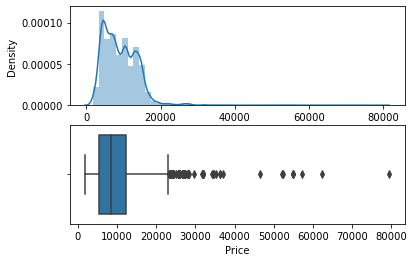

In [39]:
# Plotting Outliers
plt.figure(figsize=(30, 20))
fig,(ax1,ax2) = plt.subplots(2, 1)
sns.distplot(data_train["Price"], ax=ax1)
sns.boxplot(data_train["Price"], ax=ax2)

In [40]:
# Deletign outiers above 40000
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/saksham/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

<Figure size 2160x1440 with 0 Axes>

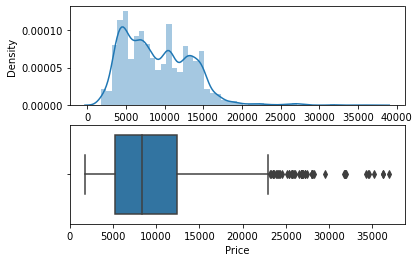

In [41]:
# Plotting Outliers again
plt.figure(figsize=(30, 20))
fig,(ax1,ax2) = plt.subplots(2, 1)
sns.distplot(data_train["Price"], ax=ax1)
sns.boxplot(data_train["Price"], ax=ax2)

In [42]:
# Input dataset
X = data_train.drop('Price', axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [43]:
# Output dataset
Y = data_train["Price"]
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [44]:
# Importing feature selection
from sklearn.feature_selection import mutual_info_classif

In [45]:
# Getting Features
features = pd.DataFrame(mutual_info_classif(X, Y), index=X.columns)
features

,0
Total_Stops,2.183641
Route_1,2.025088
Route_2,2.785124
Route_3,2.324395
Route_4,1.526015
Route_5,0.715998
Air India,0.750914
GoAir,0.087233
IndiGo,0.686284
Jet Airways,0.917606


In [46]:
# Sorting Features
features.columns = ['importance']
features.sort_values(by='importance', ascending=False)

,importance
Route_2,2.785124
Route_3,2.324395
Total_Stops,2.183641
Route_1,2.025088
Arrival_Time_hour,1.845867
Duration_hours,1.782714
Cochin,1.544501
Arrival_Time_minute,1.531306
Route_4,1.526015
Delhi,1.525297


In [47]:
# Splitting train & test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [48]:
# Predicting result
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('r2 score: {}'.format(metrics.r2_score(y_test,y_prediction)))
    print('MAE: {}%'.format(metrics.mean_absolute_error(y_test,y_prediction) / 100))
    print('RMSE: {}%'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction)) / 100))
    sns.distplot(y_test - y_prediction)

Training score : 0.9552885717488131
r2 score: 0.8108969136677989
MAE: 11.547816517338145%
RMSE: 19.520261353694295%


/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


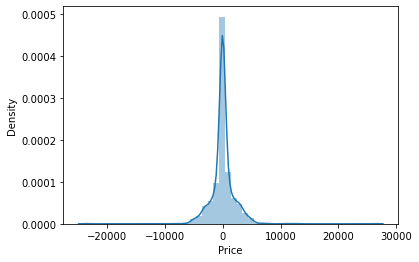

In [49]:
# Using Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

Training score : 0.6121279451884332
r2 score: 0.6223717149534174
MAE: 19.29993682732803%
RMSE: 27.58471985626159%


/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


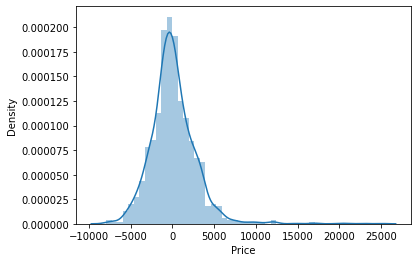

In [50]:
# Using Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
predict(LinearRegression())

Training score : 0.7899821662079066
r2 score: 0.6408490101512896
MAE: 17.748795507721102%
RMSE: 26.901398224712192%


/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


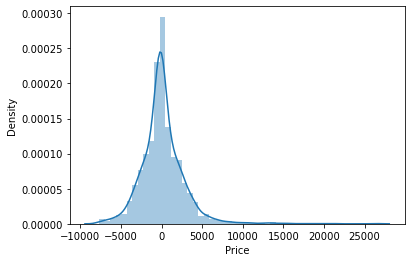

In [51]:
# Using KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor())

Training score : 0.9676077536831962
r2 score: 0.7269214480344217
MAE: 13.117608875370456%
RMSE: 23.45741305150973%


/home/saksham/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


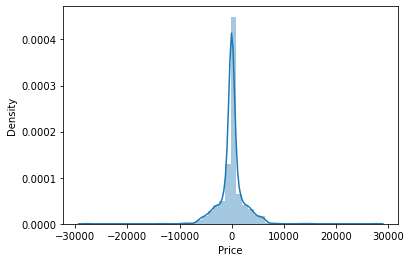

In [52]:
# Using Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())